<a href="https://colab.research.google.com/github/komzy/spark-ml-course/blob/main/week1/Spark_with_ML_Week_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using Spark operations and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 



In [11]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!ls spark-3.1.1-bin-hadoop3.2/bin

beeline		      pyspark		spark-class.cmd   spark-sql
beeline.cmd	      pyspark2.cmd	sparkR		  spark-sql2.cmd
docker-image-tool.sh  pyspark.cmd	sparkR2.cmd	  spark-sql.cmd
find-spark-home       run-example	sparkR.cmd	  spark-submit
find-spark-home.cmd   run-example.cmd	spark-shell	  spark-submit2.cmd
load-spark-env.cmd    spark-class	spark-shell2.cmd  spark-submit.cmd
load-spark-env.sh     spark-class2.cmd	spark-shell.cmd


In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [15]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .master("local[*]")\
        .appName('week1_assignment') \
        .getOrCreate()
# Test the spark 
spark
# Check the pyspark version
print(pyspark.__version__)

3.1.1


In [17]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

In [21]:
#Load Data with Spark and convert to spark.DataFrames
pandas_df = pd.read_excel('covid_final_data.xlsx')
#Data Cleaning
pandas_df["Date"]= pd.to_datetime(pandas_df.Date)
n= "Tests  performed in last 24 hours"    
input = pandas_df[n]
output = []
for letter in input :
        try :
            int(letter)
            output.append(letter)

        except ValueError :
                output.append(0)
                pass

pandas_df[n] = output
#pandas_df.head(52)

spark_df = spark.createDataFrame(pandas_df)
#spark_df.show(52,False)


In [22]:
#write/read in ORC
spark_df.write.orc('covid_final_data.orc')
!ls
#spark.read.orc('covid_final_data.orc').show()

covid_final_data.orc   spark-3.1.1-bin-hadoop3.2
covid_final_data.xlsx  spark-3.1.1-bin-hadoop3.2.tgz
sample_data	       spark-3.1.1-bin-hadoop3.2.tgz.1


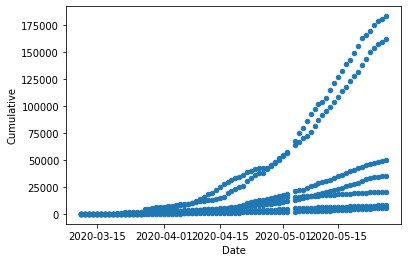

In [23]:
# Convert Spark DataFrame to Pandas. 
df_pandas = spark_df.toPandas()  
df_pandas.plot(x ='Date', y='Cumulative', kind = 'scatter')


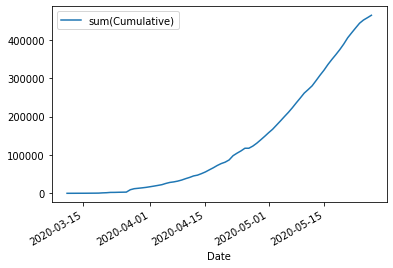

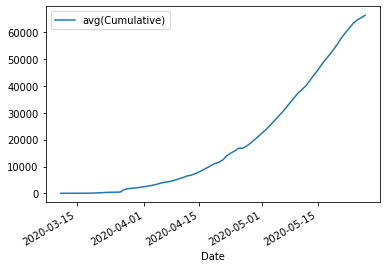

In [73]:
group_by = ['Date']

# Plot mean of cases per day for all of Pakistan
date_sum_sdf=spark_df.groupby(group_by).sum()
#date_sum_sdf.sort(col("Date").asc()).show(truncate=False)
date_sum_pdf=date_sum_sdf.toPandas()
date_sum_pdf.plot(x ='Date', y='sum(Cumulative)', kind = 'line')

#Plot cumulative cases per day for all of Pakistan
date_mean_sdf=spark_df.groupby(group_by).mean()
#date_mean_sdf.sort(col("Date").asc()).show(truncate=False)
date_mean_pdf=date_mean_sdf.toPandas()
date_mean_pdf.plot(x ='Date', y='avg(Cumulative)', kind = 'line')




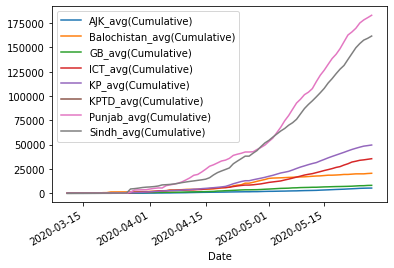

In [104]:
#Plot mean of cases per day for states
states_mean_sdf=spark_df.groupBy("Date").pivot("Region").mean()
#states_mean_sdf.sort(col("Date").asc()).show(100,truncate=False)
states_mean_pdf = states_mean_sdf.toPandas()
#states_mean_pdf=states_mean_pdf.head(20)
states_mean_pdf.plot(x ='Date', y=["AJK_avg(Cumulative)",
                                   "Balochistan_avg(Cumulative)",
                                   "GB_avg(Cumulative)",
                                   "ICT_avg(Cumulative)",
                                   "KP_avg(Cumulative)",
                                   "KPTD_avg(Cumulative)",
                                   #"Mobile Lab_avg(Cumulative)",
                                   "Punjab_avg(Cumulative)",
                                   "Sindh_avg(Cumulative)"
                                   ], kind = 'line')



## Part B: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using KOALAS library and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 

In [105]:
! pip install koalas

     |████████████████████████████████| 1.4MB 15.5MB/s 


In [106]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
pd.__version__
np.__version__
ks.__version__

'1.7.0'